# First computer exercise in Machine Learning: Unsupervised methods
==============================================================================================================


## Part A: Principal Component Analysis

Write a function that performs PCA on a (not necessarily centered) data in a 2D numpy array. The function should return the pca transformed data along with the eigenvalues and eigenvectors of the tranformation. Use the numpy package. 

In [1]:
import numpy as np
# Hint: Use this code snippet to find eigenvectors
#       and eigenvalues of an array and return them 
#       in an order of descending eigenvalues
E, V = np.linalg.eig(np.array([[0,2], [1, 1]]))
key = np.argsort(E)[::-1]
V = V[:,key]
E = E[key]
print(E)
print(V)

[ 2. -1.]
[[-0.70710678 -0.89442719]
 [-0.70710678  0.4472136 ]]


In [2]:
def principal_component_analysis(data, pca_components=2):
    """
    PCA with eigenvalues
    
    :param data: A 2d numpy array where data.shape == (number_of_data_points, dimensionality_of_data_points)
    :returns: tuple (U, E, V) 
        WHERE
        U is a numpy array of the pca transformed data
        E is an descending numpy array of the eigenvalues of the covariance matrix
        V is an array of eigenvectors of the cov. matrix such that eigenvalue E[i] corresponds to V[i,:]
    """
    ### YOUR CODE STARTS HERE ###
    
    m, n = data.shape
    data -= data.mean(axis=0)
    R = np.cov(data, rowvar=False)
    evals, evecs = np.linalg.eig(R)
    idx = np.argsort(evals)[::-1]
    evecs = evecs[:,idx]
    E = evals[idx]
    V = evecs[:, :pca_components]
    U = np.dot(V.T, data.T).T
    V = np.transpose(V)
    ### YOUR CODE ENDS HERE ###
    return (U, E, V)

We will begin with the MNIST handwritten digit image data set https://en.wikipedia.org/wiki/MNIST_database.

(70000, 784)
(70000,)


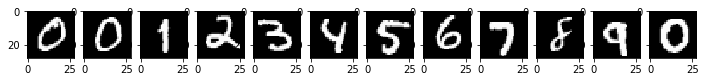

In [3]:
import sklearn.datasets as ds
import matplotlib.pyplot as plt 
from course_utils import *
dataset = ds.fetch_mldata('MNIST original', data_home="./lotsofspace/mnist")
XX, YY = dataset["data"].astype('float'), np.array(dataset["target"]).astype('float')
print(XX.shape)
print(YY.shape)
plt.figure(figsize=(12, 12))
for i in range(12):
    plt.subplot(1, 12, i+1)
    plt.imshow(np.reshape(XX[int(i*5500),:], (28, 28)), cmap="gray")
plt.show()

In [4]:
'''
from course_utils import *

#  The images have been scaled down to 8x8 pixels, and will be stored in a flat numpy vector. 
XX, YY = load_mnist_data()
print("The shape of the data vector XX is: {}".format(XX.shape))
print("The shape of the label vector YY is: {}" .format(YY.shape))
# Display samples
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(np.reshape(XX[i,:], (8, 8)), cmap="gray")
plt.show()
'''


'\nfrom course_utils import *\n\n#  The images have been scaled down to 8x8 pixels, and will be stored in a flat numpy vector. \nXX, YY = load_mnist_data()\nprint("The shape of the data vector XX is: {}".format(XX.shape))\nprint("The shape of the label vector YY is: {}" .format(YY.shape))\n# Display samples\nfor i in range(10):\n    plt.subplot(1, 10, i+1)\n    plt.imshow(np.reshape(XX[i,:], (8, 8)), cmap="gray")\nplt.show()\n'

Check that your function outputs a solution that agrees with the canonical python implementation of PCA

In [5]:
# XXX: I can just do this for randn_data like I do below for K-Means, it's weird to introduce MNIST before testing PCA

In [6]:
from sklearn.decomposition import PCA
(U, E, V) = principal_component_analysis(XX, 2)
pca = PCA(n_components=2)
pca.fit(XX)
if np.transpose(V).shape == pca.components_.shape:
    print("Try transposing your eigenvector output")
assert(np.allclose([1, 1], np.abs(np.diagonal(np.inner(V, pca.components_)))))
print("Passed")

Passed


See how the MNIST data set looks like with $n=2$ PCA components:

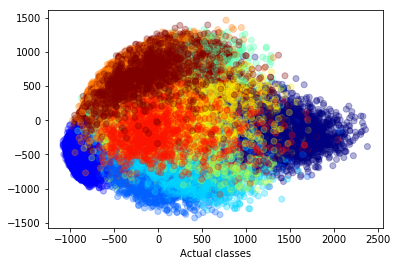

In [7]:
pca_features, _, V = principal_component_analysis(XX, 2)
plt.xlabel('Actual classes')
plt.scatter(pca_features[:,0], pca_features[:,1], c=YY, alpha=0.3, cmap="jet")
plt.show()

Visualize the principal components of the MNIST data set for $n=10$ components.

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  import sys


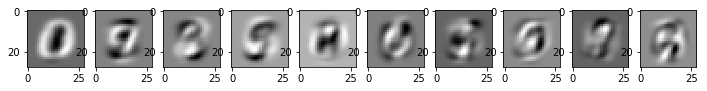

In [8]:
pca_features, _, V = principal_component_analysis(XX, 10)
plt.figure(figsize=(12, 12))

for i in range(10):
    plt.subplot(1, 10, i+1)
    comp_image = np.reshape(V[i,:], (28,28))
    plt.imshow(comp_image.astype('float'), cmap="gray")
plt.show()

Do a similar visualization for a reduced version of the German Traffic Sign Recognition Benchmark, distributed by the INI

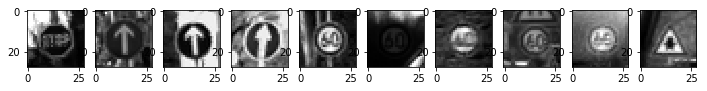

In [9]:
# TODO: Host the file (now in self message on telegram/slack) somewhere and explain how to get and set up the data
X, Y = load_ini_data2(duckdns=True)
ini_clusters = len(np.unique(Y))
plt.figure(figsize=(12, 12))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(np.reshape(X[int(i*110),:], (28, 28)), cmap="gray")
plt.show()

Visualize the data set:

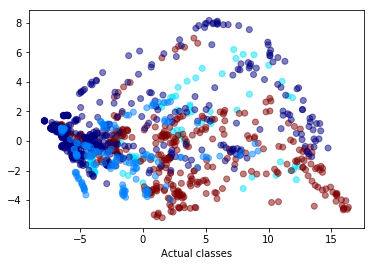

In [10]:
pca_features, _, V = principal_component_analysis(X, 2)
plt.xlabel('Actual classes')
plt.scatter(pca_features[:,0], pca_features[:,1], c=Y, alpha=0.5, cmap="jet")
plt.show()

Visualize the "eigensigns".

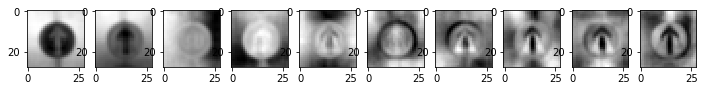

In [11]:
pca_features, _, V = principal_component_analysis(X, 10)
plt.figure(figsize=(12, 12))

for i in range(10):
    plt.subplot(1, 10, i+1)
    comp_image = np.reshape(V[i,:], (28, 28))
    plt.imshow(comp_image, cmap="gray")
plt.show()

## Part B: Whitening
Use your PCA implemention to complete this whitening function.

In [12]:
from sklearn.decomposition import PCA #XX: Delete me before course###

def whiten(data):
    """
    K-Means Clustering

    :param data: A 2d numpy array of where data.shape == (number_of_data_points,
                 dimensionality_of_data_points), assume that the data is centered
    :returns: tuple (whitened_data, whitening_matrix) 
        WHERE
        whitened_data is the transformed input data whose covariance is the identity matrix
        whitening_matrix is the transformation that yields the whitening: 
                         np.dot(whitening_matrix, data.T) == whitened_data.T
    """

    ### YOUR CODE STARTS HERE ###
    X = np.array(data)
    pca = PCA(n_components=X.shape[1])
    pca.fit(X)

    (U, E, V) = principal_component_analysis(X, X.shape[1])
    Lambda = np.zeros((len(pca.singular_values_), len(pca.singular_values_)))
    np.fill_diagonal(Lambda, np.power(E, -0.5))
    X = np.dot(np.dot(Lambda, V), X.T)
    whitened_data = X
    whitening_matrix = np.dot(Lambda, V)
    ### YOUR CODE ENDS HERE ###
    
    return (whitened_data, whitening_matrix)

Identity covariance test:

In [13]:
import numpy as np###
rnd_data = np.random.multivariate_normal([0, 0], [[3, 4], [5, 6]], 1000)
print(rnd_data.shape)
whitened_data, whitening_matrix = whiten(rnd_data)
assert(np.allclose(np.identity(2), np.cov(whitened_data)))
print("Passed")

(1000, 2)
Passed


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  


Data recovery test:

In [14]:
inverse_whitening = np.linalg.inv(whitening_matrix)
recovered_data = np.dot(inverse_whitening, whitened_data)
if recovered_data.shape != rnd_data.shape:
    recovered_data = recovered_data.T
assert(np.allclose(rnd_data, recovered_data, atol=0.2))
print("Passed")

Passed


Inspect the effect of whitening

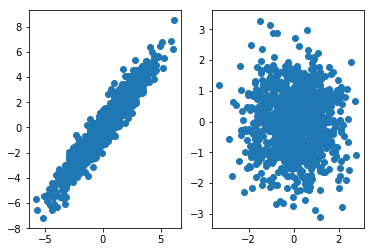

In [15]:
plt.subplot(1, 2, 1)
plt.scatter(rnd_data[:,0], rnd_data[:,1])
if rnd_data.shape != whitened_data.shape:
    whitened_data = whitened_data.T
plt.subplot(1, 2, 2)
plt.scatter(whitened_data[:,0], whitened_data[:,1])
plt.show()


## Part C: Slow Feature Analysis

Use your PCA and whitening functions to implement SFA.

In [16]:
def slow_feature_analysis(data, n_features):
    """
    Slow Feature Analysis
    
    :param data: A numpy array where data.shape == (number_of_data_points, dimensionality_of_data_points)
    :param n_features: The number of slowest features to calculate for each point
    
    :returns sfa_transformed_data: An array of the sfa transformed data with shape (data.shape[0], n_features)
    """
    ### YOUR CODE STARTS HERE ###
    whitened_data, _ = whiten(data)
    whitened_data = whitened_data.T
    derivative = lambda Z: Z[1:, :]-Z[:-1, :]
    whitened_derivatives = derivative(whitened_data)
    (U, E, V) = principal_component_analysis(whitened_derivatives, data.shape[1])
    sfa_transformed_data = whitened_data.dot(V[-n_features:,:].T)
    sfa_transformed_data = np.fliplr(sfa_transformed_data)
    ### YOUR CODE ENDS HERE ###
    return sfa_transformed_data


Identity covariance test:

In [22]:
sfa_dims = 2
rnd_data = np.random.multivariate_normal([0, 0], [[3, 4], [5, 6]], 1000)
sfa_homemade = slow_feature_analysis(rnd_data, sfa_dims)
assert(np.allclose(np.identity(2), np.cov(sfa_homemade.T)))
print("Passed")

Passed


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  


Slowness test:

In [23]:
import mdp
def calculate_deltas(feature_array):
    derivatives = feature_array[1,:] - feature_array[:-1,]
    power = np.power(derivatives, 2) 
    return np.mean(power, axis=0)
sfa = mdp.nodes.SFANode(output_dim=sfa_dims)
sfa_mdp = sfa.execute(rnd_data)
assert(np.allclose(calculate_deltas(sfa_homemade), calculate_deltas(sfa_mdp)))
print("Passed")

Passed


Visualize the SFA-transformed traffic sign data. 

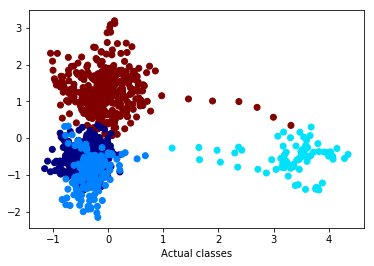

In [24]:
# Viz with 2 sfa features
# TODO: Swap out the KMeans function calls with k_means
from sklearn.cluster import KMeans
import mdp
slow_features = slow_feature_analysis(X, 2)
plt.scatter(slow_features[:,0], slow_features[:,1], c=Y, cmap="jet")
plt.xlabel("Actual classes")
plt.show()

## Part D: K-Means clustering
Complete this function that calculates the reconstruction error of a clustering assignment according to the lecture notes.


In [25]:
def km_error(data, centroids, assignment):
    """
    K-Means error
    
    :param data: A 2D numpy array where data.shape == (number_of_data_points, dimensionality_of_data)
    :param centroids: A 2D numpy array where centroids.shape == (n_clusters, dimensionality_of_data)
    :param assignment: A list defining the allocation of the data to clusters such that data[i,:] belongs to
                       cluster assignment[i], corresponding to centroids[clustering[i]]
                       assume that the cluster labels are integers in 0, ..., n_clusters
    
    :returns total_error: The reconstruction error of the clustering (eq. 1 lecture notes on clustering)
    """
    ### YOUR CODE STARTS HERE ###
    total_error = 0
    for i in range(data.shape[0]):
        total_error += np.linalg.norm(data[i,:] - centroids[assignment[i]])**2
    ### YOUR CODE ENDS HERE ###
    return total_error 

Test km_error:

In [26]:
from sklearn.cluster import KMeans
kmeans = KMeans(init='random', n_clusters=5)
rnd_data = np.random.multivariate_normal([0,0], [[1, 0], [0, 1]], 100)
kmeans.fit(rnd_data)
assert(np.allclose(kmeans.inertia_, km_error(rnd_data, kmeans.cluster_centers_, kmeans.labels_)))
print("Passed")

Passed


Now write a function that calculates the optimal choice of cluster centers:

In [27]:
def km_centers(data, assignment, n_clusters):
    """
    K-Means centroids
    
    :param data: A 2D numpy array where data.shape == (number_of_data_points, dimensionality_of_data)
    :param assignment: A list defining the allocation of the data to clusters such that data[i,:] belongs to
                       cluster assignment[i]
                       assume that the cluster labels are integers in 0, ..., n_clusters
    :param n_clusters: the upper bound on the values that the elements in assignment can take
    
    :returns centroids: A 2D numpy array where centroids.shape == (n_clusters, dimensionality_of_data),
                        calculated according to eq. 2 in the lecture notes on clustering
    
    """
    ### YOUR CODE STARTS HERE ###
    centroids = np.zeros((n_clusters, data.shape[1]))
    N = np.zeros(n_clusters)
    for i in range(len(N)):
        N[i] = np.sum(1 for j in assignment if j == i)
    for i in range(data.shape[0]):
        centroids[assignment[i]] += data[i,:]
    for i in range(n_clusters):
        for j in range(data.shape[1]):
            centroids[i,j]/=N[i] 
    ### YOUR CODE ENDS HERE ###
    return centroids


Test km_centers:

In [28]:
kmeans = KMeans(init='random', n_clusters=5)
rnd_data = np.random.multivariate_normal([0,0], [[1, 0], [0, 1]], 100)
kmeans.fit(rnd_data)
assert(np.allclose(kmeans.cluster_centers_, km_centers(rnd_data, kmeans.labels_, 5)))
print("Passed")

Passed


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.


Write a k-means clustering algorithm that gets a numpy array of data, along with a number $k$ of clusters and a convergence threshold. Use the previous two functions you wrote above and choose the initial center locations randomly from the data points.

In [29]:
import numpy as np
def k_means(data, n_clusters, threshold):
    """
    K-Means Clustering
    
    :param data: A 2d numpy array where data.shape == (number_of_data_points, dimensionality_of_data_points)
    :param n_clusters: The number of clusters the algorithm finds
    :param threshold: The minimum change in eq. 1 (lecture notes on clustering) before algorithm stops 
    :returns assignment: a list of class assignments such that point data[i,:] belongs to cluster assignment[i]
    """
    
    ### YOUR CODE STARTS HERE ###
    kmeans = KMeans(init='random', n_clusters=n_clusters)
    kmeans.fit(slow_features)
    assignment = kmeans.predict(slow_features)
    ### YOUR CODE ENDS HERE ###
    return assignment

Inspect the performance of k-means clustering on the sfa-transformed sign data. Try varying the convergence threshold and compare your results with the previous plot, containing the actual classes.

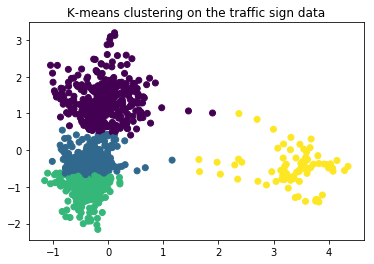

In [30]:
slow_features = slow_feature_analysis(X, 2)
classes = k_means(slow_features, ini_clusters, threshold=0.001)
plt.scatter(slow_features[:,0], slow_features[:,1], c=classes)
plt.title("K-means clustering on the traffic sign data")
plt.show()